<a href="https://colab.research.google.com/github/mpfoster/Biochem6765/blob/master/hwk2_tips_6765.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# For fitting binding data using lmfit (6765 homework 2)


In [0]:
# load the required libraries
# import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
!pip install lmfit;
from lmfit import Model, Parameter, report_fit  # import the desired components

     |████████████████████████████████| 266kB 4.8MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
     |████████████████████████████████| 235kB 42.9MB/s 
  Created wheel for lmfit: filename=lmfit-1.0.0-cp36-none-any.whl size=87915 sha256=2dc9860e1912005755e9d6ea39cb7ad599bb2a0e30db426e8a05245cdf89e3d3
  Stored in directory: /root/.cache/pip/wheels/1f/93/e9/8d3f759e466f5bbfed3ba1d7dc5b3d4389c469a1ec9a2acaee
  Created wheel for asteval: filename=asteval-0.9.18-cp36-none-any.whl size=17382 sha256=85be81da21c81d17051cec14fc6ed1b0f310a3ad26d233f176d57e6cb00233cf
  Stored in directory: /root/.cache/pip/wheels/1c/53/1b/28d929700c9633b1786a4982e6db564ec8326a8930234dcc19
  Created wheel for uncertainties: filename=uncertainties-3.1.2-cp36-none-any.whl size=96457 sha256=556d4e2c8b28bc680a87a06527daf342a0969076761e7cdc91257d5cbba26483
  Stored in directory: /root/.cache/pip/wheels/d9/d3/0e/5b0b743a8abd50373705427438456da5dc2621891138d7a618
Successfully built lmfit asteval uncertainties

In [0]:
# load some data from the web, at
# https://www.asc.ohio-state.edu/foster.281/gnuplot/gnuplot_tutorial1_files/example1.txt
#df = pd.read_table("https://www.asc.ohio-state.edu/foster.281/gnuplot/gnuplot_tutorial1_files/example1.txt",sep='\s+', header=None, comment='#')
df = pd.read_csv("https://github.com/mpfoster/Biochem6765/raw/master/data/data2.csv", comment='#')
#df.iloc[:,0]
df.Lt = df.Lt.multiply(1e9) # change units to nanomolar (1e-9 M)
df.head()

,Lt,Y
0,1.6,0.001
1,3.2,0.003
2,6.4,0.006
3,12.8,0.012
4,25.6,0.023


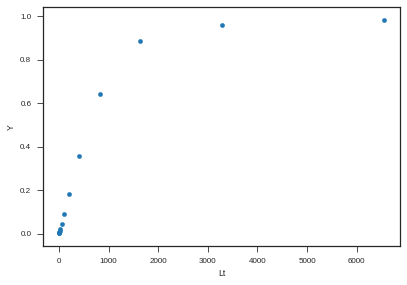

In [134]:
ax = df.plot(x='Lt', y='Y', kind='scatter')
plt.style.use('seaborn-ticks')

In [152]:
def hyperbolic(x, Kd):
    return x/(x+Kd)
model = Model(hyperbolic, independent_vars=['x'])
result = model.fit(df.Y, x=df.Lt, Kd=1)
result.params.pretty_print()

Name     Value      Min      Max   Stderr     Vary     Expr Brute_Step
Kd     541.9     -inf      inf    73.99     True     None     None


(<Figure size 460.8x460.8 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

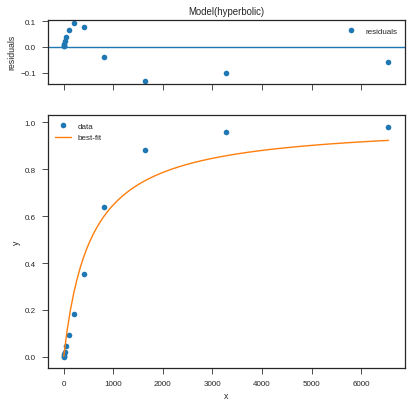

In [153]:
result.plot(numpoints=100)

In [138]:
def hill(x, Kd, n):
    return x**n/(x**n+Kd**n)
model = Model(hill, independent_vars=['x'])
Kd = 10; n = 1 # starting values
result = model.fit(df.Y, x=df.Lt, Kd=Kd, n=n)
result.params.pretty_print()

Name     Value      Min      Max   Stderr     Vary     Expr Brute_Step
Kd     553.3     -inf      inf    17.18     True     None     None
n      1.606     -inf      inf  0.07076     True     None     None


(<Figure size 460.8x460.8 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

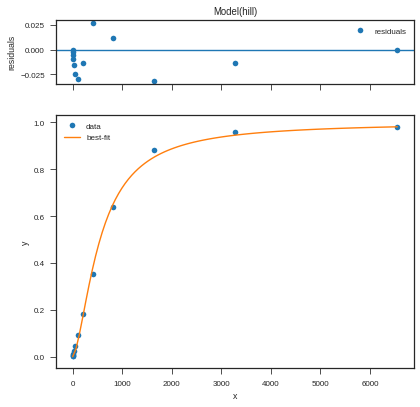

In [150]:
result.plot(numpoints=100)
#result.plot_fit()
#result.plot_residuals()

In [154]:
#def quadratic(x, Mt, Kd):
#  return ((Kd+x+Mt)-((Kd+x+Mt)**2-4*x*Mt)**0.5)/(2*Mt)
  
#model = Model(quadratic, independent_vars=['x','Mt'])
#model = Model(quadratic, independent_vars=['x'])
#result = model.fit(df.Y, x=df.Lt, Mt=Mt, Kd=1)  # starting param; Mt = 1e3 nM, i.e., 1e-6M

def quadratic(x, Kd):  # Here Mt will be defined globally -- not optimized
  return ((Kd+x+Mt)-((Kd+x+Mt)**2-4*x*Mt)**0.5)/(2*Mt)
  
Mt = 1e3  # that's 1000 nM, if rescaled from molar
model = Model(quadratic, independent_vars=['x'])
result = model.fit(df.Y, x=df.Lt, Kd=1)  # starting param; Mt = 1e3 nM, i.e., 1e-6M

v = result.params.valuesdict()  # fitted variables
Kd = v['Kd']
result.params.pretty_print()

Name     Value      Min      Max   Stderr     Vary     Expr Brute_Step
Kd       100     -inf      inf   0.2262     True     None     None


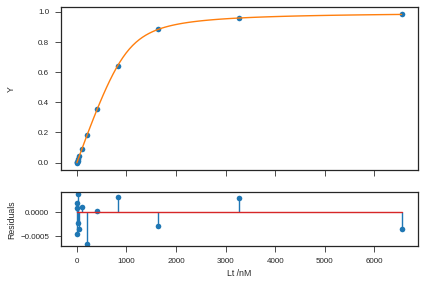

In [155]:
#plt.style.available
plt.style.use('seaborn-ticks')
maxLt = df.Lt.max()
import numpy as np
simx = np.linspace(0,maxLt,100)

fig, ax = plt.subplots(2, 1, sharex='col', gridspec_kw = {'height_ratios':[3, 1]})
ax[0].plot(df.Lt,df.Y, 'o')
ax[0].plot(simx,quadratic(simx,Kd),'-')
ax[0].set_ylabel('Y')
ax[1].stem(df.Lt,df.Y-quadratic(df.Lt,Kd),use_line_collection=True)
ax[1].set_xlabel('Lt /nM')
ax[1].set_ylabel('Residuals')
fig.align_ylabels(ax[:,])


(<Figure size 748.8x748.8 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

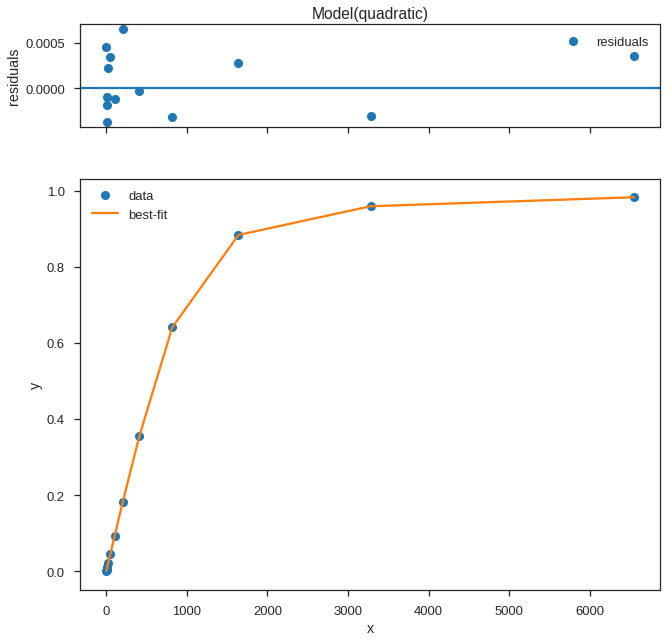

In [87]:
result.plot()